In [123]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder

In [42]:
df=pd.read_csv(r"C:\Users\cchap\OneDrive\Desktop\Student Mental health.csv")
df.head()

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


## there is no na (missing) values in df

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 11 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Timestamp                                     101 non-null    object 
 1   Choose your gender                            101 non-null    object 
 2   Age                                           100 non-null    float64
 3   What is your course?                          101 non-null    object 
 4   Your current year of Study                    101 non-null    object 
 5   What is your CGPA?                            101 non-null    object 
 6   Marital status                                101 non-null    object 
 7   Do you have Depression?                       101 non-null    object 
 8   Do you have Anxiety?                          101 non-null    object 
 9   Do you have Panic attack?                     101 non-null    obj

In [47]:
df_copy=df.rename(columns={"Choose your gender": "gender",
                           "Age" :"age",
                           "What is your course?":"course",
                           "Your current year of Study":"year",
                           "What is your CGPA?":"gpa",
                           "Marital status":"marital",
                           "Do you have Depression?":"depression",
                           "Do you have Anxiety?":"anxiety",
                           "Do you have Panic attack?":"panic",
                           "Did you seek any specialist for a treatment?":"seek"
                          })

In [50]:
df_copy.sample()

,Timestamp,gender,age,course,year,gpa,marital,depression,anxiety,panic,seek
42,8/7/2020 14:58,Female,20.0,Usuluddin,year 2,3.00 - 3.49,No,Yes,No,No,No


In [49]:
df_copy["gender"].unique()

array(['Female', 'Male'], dtype=object)

In [64]:
df_copy.shape

(101, 11)

In [74]:
df_copy["year"].unique()

array(['year 1', 'year 2', 'Year 1', 'year 3', 'year 4', 'Year 2',
       'Year 3'], dtype=object)

In [76]:
df_copy["year"].replace({"Year 1":"year 1",
                        "Year 2":"year 2",
                         "Year 3":"year 3",
                         "Year 4":"year 4"
                        },inplace=True)

In [77]:
df_copy["year"].unique()

array(['year 1', 'year 2', 'year 3', 'year 4'], dtype=object)

In [78]:
df_copy["gpa"].unique()

array(['3.00 - 3.49', '3.50 - 4.00', '3.50 - 4.00 ', '2.50 - 2.99',
       '2.00 - 2.49', '0 - 1.99'], dtype=object)

In [79]:
df_copy["gpa"].replace({"3.50 - 4.00 ":"3.50 - 4.00"},inplace=True)

In [81]:
df_copy["gpa"].unique()

array(['3.00 - 3.49', '3.50 - 4.00', '2.50 - 2.99', '2.00 - 2.49',
       '0 - 1.99'], dtype=object)

In [82]:
df_copy.sample()

,Timestamp,gender,age,course,year,gpa,marital,depression,anxiety,panic,seek
97,13/07/2020 21:21:42,Male,18.0,Engineering,year 2,3.00 - 3.49,No,Yes,Yes,No,No


In [83]:
df_copy["marital"].unique()

array(['No', 'Yes'], dtype=object)

In [84]:
df_copy["depression"].unique()

array(['Yes', 'No'], dtype=object)

In [85]:
df_copy["anxiety"].unique()

array(['No', 'Yes'], dtype=object)

In [86]:
df_copy["panic"].unique()

array(['Yes', 'No'], dtype=object)

In [87]:
df_copy["seek"].unique()

array(['No', 'Yes'], dtype=object)

In [88]:
df.head(4)

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No


## need to make dummy variables to handle categorial data 
### one hot encoding can be done by using pandas dummy variable or scikit learn one hot encoder

In [94]:
df_copy_dummies=pd.get_dummies(data=df_copy,columns=["gender","marital","depression","anxiety","panic","seek"],drop_first=True)

In [107]:
df_copy_dummies["age"]=df_copy_dummies["age"].astype("int")

In [108]:
df_copy_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 100
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Timestamp       100 non-null    object
 1   age             100 non-null    int32 
 2   course          100 non-null    object
 3   year            100 non-null    object
 4   gpa             100 non-null    object
 5   gender_Male     100 non-null    uint8 
 6   marital_Yes     100 non-null    uint8 
 7   depression_Yes  100 non-null    uint8 
 8   anxiety_Yes     100 non-null    uint8 
 9   panic_Yes       100 non-null    uint8 
 10  seek_Yes        100 non-null    uint8 
dtypes: int32(1), object(4), uint8(6)
memory usage: 9.0+ KB


In [109]:
df_copy_dummies.sample()

,Timestamp,age,course,year,gpa,gender_Male,marital_Yes,depression_Yes,anxiety_Yes,panic_Yes,seek_Yes
6,8/7/2020 12:32,23,Pendidikan islam,year 2,3.50 - 4.00,0,1,1,0,1,0


In [110]:
df_copy_dummies

,Timestamp,age,course,year,gpa,gender_Male,marital_Yes,depression_Yes,anxiety_Yes,panic_Yes,seek_Yes
0,8/7/2020 12:02,18,Engineering,year 1,3.00 - 3.49,0,0,1,0,1,0
1,8/7/2020 12:04,21,Islamic education,year 2,3.00 - 3.49,1,0,0,1,0,0
2,8/7/2020 12:05,19,BIT,year 1,3.00 - 3.49,1,0,1,1,1,0
3,8/7/2020 12:06,22,Laws,year 3,3.00 - 3.49,0,1,1,0,0,0
4,8/7/2020 12:13,23,Mathemathics,year 4,3.00 - 3.49,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
96,13/07/2020 19:56:49,21,BCS,year 1,3.50 - 4.00,0,0,0,1,0,0
97,13/07/2020 21:21:42,18,Engineering,year 2,3.00 - 3.49,1,0,1,1,0,0
98,13/07/2020 21:22:56,19,Nursing,year 3,3.50 - 4.00,0,1,1,0,1,0
99,13/07/2020 21:23:57,23,Pendidikan Islam,year 4,3.50 - 4.00,0,0,0,0,0,0


In [113]:
df_copy_dummies.drop(columns="Timestamp",axis=1,inplace=True

In [114]:
df_copy_dummies

,age,course,year,gpa,gender_Male,marital_Yes,depression_Yes,anxiety_Yes,panic_Yes,seek_Yes
0,18,Engineering,year 1,3.00 - 3.49,0,0,1,0,1,0
1,21,Islamic education,year 2,3.00 - 3.49,1,0,0,1,0,0
2,19,BIT,year 1,3.00 - 3.49,1,0,1,1,1,0
3,22,Laws,year 3,3.00 - 3.49,0,1,1,0,0,0
4,23,Mathemathics,year 4,3.00 - 3.49,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
96,21,BCS,year 1,3.50 - 4.00,0,0,0,1,0,0
97,18,Engineering,year 2,3.00 - 3.49,1,0,1,1,0,0
98,19,Nursing,year 3,3.50 - 4.00,0,1,1,0,1,0
99,23,Pendidikan Islam,year 4,3.50 - 4.00,0,0,0,0,0,0


In [115]:
df_copy_dummies["gpa"].unique()

array(['3.00 - 3.49', '3.50 - 4.00', '2.50 - 2.99', '2.00 - 2.49',
       '0 - 1.99'], dtype=object)

# 0-1.99 == "F"
# 2.00 -2.49 == "C"
# 2.50 -2.99 == "B"
# 3.00 - 3.49 == "A"
# 3.50 -4.00 ==" A+"

In [116]:
df_copy_dummies["gpa"].replace({
    "0 - 1.99":"F",
    "2.00 - 2.49":"C",
    "2.50 - 2.99":"B",
    "3.50 - 4.00":"A",
    "3.00 - 3.49":"A+"    
},inplace=True)

In [119]:
df_copy_dummies

,age,course,year,gpa,gender_Male,marital_Yes,depression_Yes,anxiety_Yes,panic_Yes,seek_Yes
0,18,Engineering,year 1,A+,0,0,1,0,1,0
1,21,Islamic education,year 2,A+,1,0,0,1,0,0
2,19,BIT,year 1,A+,1,0,1,1,1,0
3,22,Laws,year 3,A+,0,1,1,0,0,0
4,23,Mathemathics,year 4,A+,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
96,21,BCS,year 1,A,0,0,0,1,0,0
97,18,Engineering,year 2,A+,1,0,1,1,0,0
98,19,Nursing,year 3,A,0,1,1,0,1,0
99,23,Pendidikan Islam,year 4,A,0,0,0,0,0,0


In [122]:
# df_copy_dummies.to_csv(r"C:\Users\cchap\OneDrive\Desktop\Student Mental healthRefine.csv")

## data is the new refined csv file or df to work on 

##  need to perform ordinal encoing on gpa data 

In [159]:
data=pd.read_csv(r"C:\Users\cchap\OneDrive\Desktop\Student Mental healthRefine.csv")
data.drop(columns="Unnamed: 0",axis=1,inplace=True)

In [160]:
data.head()

,age,course,year,gpa,gender_Male,marital_Yes,depression_Yes,anxiety_Yes,panic_Yes,seek_Yes
0,18,Engineering,year 1,A+,0,0,1,0,1,0
1,21,Islamic education,year 2,A+,1,0,0,1,0,0
2,19,BIT,year 1,A+,1,0,1,1,1,0
3,22,Laws,year 3,A+,0,1,1,0,0,0
4,23,Mathemathics,year 4,A+,1,0,0,0,0,0


In [162]:
gpa_order={"A+":4,"A":3.5,"B":3,"C":2,"F":1}

In [164]:
data["gpa_enc"]=data["gpa"].map(gpa_order)

In [165]:
course_order={"year 1":1,"year 2":2,"year 3":3,"year 4":4}
data["course_enc"]=data["course"].map(course_order)

In [166]:
data.drop(columns="course_enc",axis=1,inplace=True)

In [167]:
year_order={"year 1":1,"year 2":2,"year 3":3,"year 4":4}
data["year_enc"]=data["year"].map(year_order)

In [169]:
data.head()

,age,course,year,gpa,gender_Male,marital_Yes,depression_Yes,anxiety_Yes,panic_Yes,seek_Yes,gpa_enc,year_enc
0,18,Engineering,year 1,A+,0,0,1,0,1,0,4.0,1
1,21,Islamic education,year 2,A+,1,0,0,1,0,0,4.0,2
2,19,BIT,year 1,A+,1,0,1,1,1,0,4.0,1
3,22,Laws,year 3,A+,0,1,1,0,0,0,4.0,3
4,23,Mathemathics,year 4,A+,1,0,0,0,0,0,4.0,4


In [172]:
data["course"].unique()

array(['Engineering', 'Islamic education', 'BIT', 'Laws', 'Mathemathics',
       'Pendidikan islam', 'BCS', 'Human Resources', 'Irkhs',
       'Psychology', 'KENMS', 'Accounting ', 'ENM', 'Marine science',
       'KOE', 'Banking Studies', 'Business Administration', 'Law',
       'KIRKHS', 'Usuluddin ', 'TAASL', 'Engine', 'ALA',
       'Biomedical science', 'koe', 'Kirkhs', 'BENL', 'Benl', 'IT', 'CTS',
       'engin', 'Econs', 'MHSC', 'Malcom', 'Kop', 'Human Sciences ',
       'Biotechnology', 'Communication ', 'Diploma Nursing',
       'Pendidikan Islam ', 'Radiography', 'psychology', 'Fiqh fatwa ',
       'DIPLOMA TESL', 'Koe', 'Fiqh', 'Islamic Education', 'Nursing ',
       'Pendidikan Islam'], dtype=object)

In [174]:
data["course"].replace({
    "Laws":"Law",
    "KOE":"Koe",
    "Engine":"Engineering",
    "engin":"Engineering",
    "BENL":"Benl",
    "Communication ":"Communication",
    "Pendidikan Islam ":"Pendidikan islam",
    "psychology":"Psychology",
    "Islamic education":"Islamic Education",
    "Pendidikan islam":"Pendidikan Islam"
},inplace=True)

In [176]:
data["course"].unique().shape

(41,)

 ## data.to_csv(r"C:\Users\cchap\OneDrive\Desktop\Student Mental healthRefine.csv")
 ## new refined file saved to desktop with student mental health refine dataframe

In [178]:
data.head()

,age,course,year,gpa,gender_Male,marital_Yes,depression_Yes,anxiety_Yes,panic_Yes,seek_Yes,gpa_enc,year_enc
0,18,Engineering,year 1,A+,0,0,1,0,1,0,4.0,1
1,21,Islamic Education,year 2,A+,1,0,0,1,0,0,4.0,2
2,19,BIT,year 1,A+,1,0,1,1,1,0,4.0,1
3,22,Law,year 3,A+,0,1,1,0,0,0,4.0,3
4,23,Mathemathics,year 4,A+,1,0,0,0,0,0,4.0,4


<AxesSubplot:xlabel='course', ylabel='gpa_enc'>

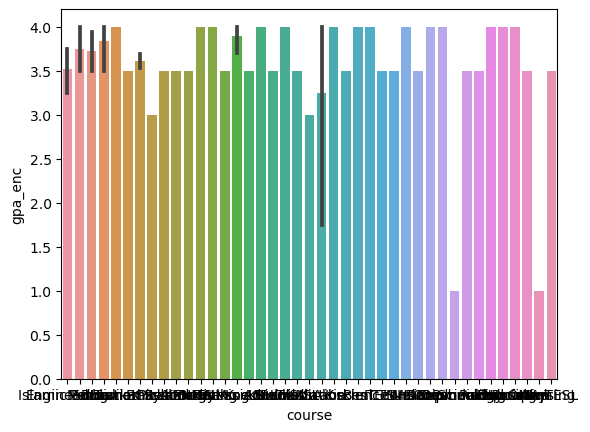

In [181]:
sns.barplot(data=data,x="course",y="gpa_enc")